# FRAUD DETECTION

In [1]:
#TASK 3
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px
import plotly.graph_objects as go
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize']=14,8
RANDOM_SEED =42
LABELS =["Normal","Fraud"]

In [2]:
df=pd.read_csv("creditcard.csv",sep=',')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## EXPLORATORY DATA ANALYSIS

In [8]:
df.isnull().values.any()

False

Visualization of fraud and normal dataset 
-Using this visualization we can analyze fraud calls or message
-Class is a column that consist of category

/tmp/ipykernel_37/1042310779.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tick1=pd.value_counts(df['Class'],sort=True)


Text(0, 0.5, 'Frequency')

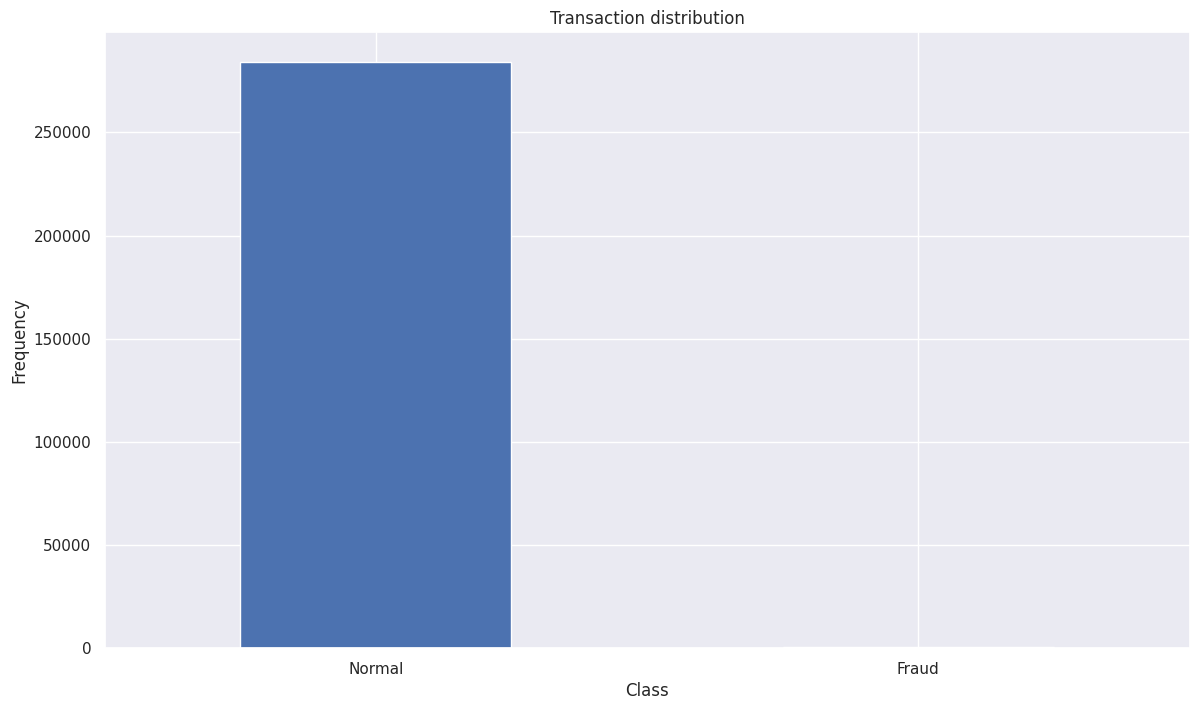

In [9]:
tick1=pd.value_counts(df['Class'],sort=True)
tick1.plot(kind='bar',rot=0)
plt.xticks(range(2),LABELS)
plt.title("Transaction distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

Classification of fraud as well as normal detection 
fraud =0 and normal=1

In [10]:
fraud1= df[df['Class']==1]
normal1=df[df['Class']==0]

In [11]:
print(fraud1.shape,normal1.shape)

(492, 31) (284315, 31)


In [12]:
#statistics of fraud in terms of amount
fraud1.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
#statistics of normal in terms of amount
normal1.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

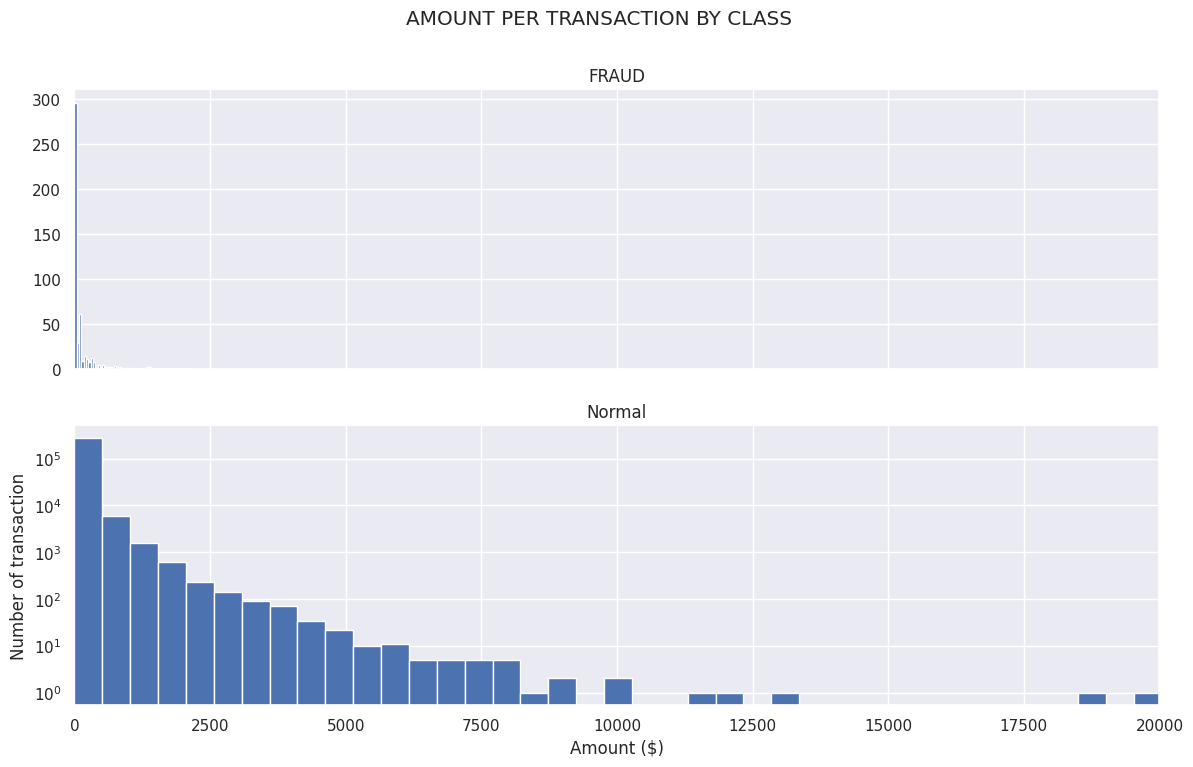

In [14]:
fig,(ax1,ax2)=plt.subplots(2,1,sharex=True)
fig.suptitle('AMOUNT PER TRANSACTION BY CLASS')
bins =50
ax1.hist(fraud1.Amount,bins=bins)
ax1.set_title('FRAUD')
ax2.hist(normal1.Amount,bins=bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of transaction')
plt.xlim((0,20000))
plt.yscale('log')
plt.show();

As we can see that there is quite a few frauds that we discovered in this histogram which we didn't in the bar plot

Now we will futher analyze the fraud and normal features interms of time as well as amount through a representation perspective

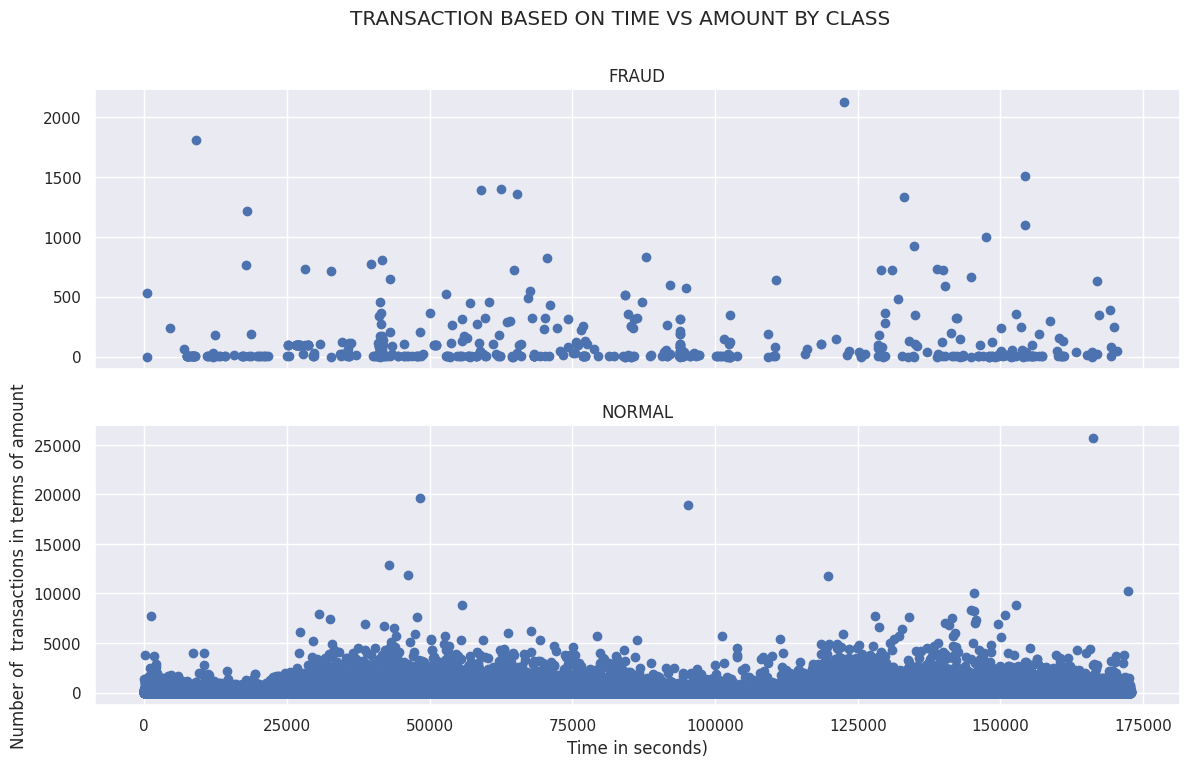

In [15]:
fig,(ax1,ax2) =plt.subplots(2,1,sharex=True)
fig.suptitle('TRANSACTION BASED ON TIME VS AMOUNT BY CLASS')
ax1.scatter(fraud1.Time,fraud1.Amount)
ax1.set_title('FRAUD')
ax2.scatter(normal1.Time,normal1.Amount)
ax2.set_title('NORMAL')
plt.xlabel('Time in seconds)')
plt.ylabel('Number of  transactions in terms of amount')
plt.show()
# here we cans see the fraud detection

In [16]:
## take some sample of data
d1=df.sample(frac=0.1,random_state=1)
d1.shape

(28481, 31)

In [17]:
df.shape

(284807, 31)

In [18]:
#determining the number of fraud detection 
fraud =d1[d1['Class']==1]
fraud2 =d1[d1['Class']==0]
outlier_frac=len(fraud)/float(len(fraud2))

In [19]:
print(outlier_frac)
print("fraud cases :{}".format(len(fraud)))
print("normal cases :{}".format(len(fraud2)))

0.0017234102419808666
fraud cases :49
normal cases :28432


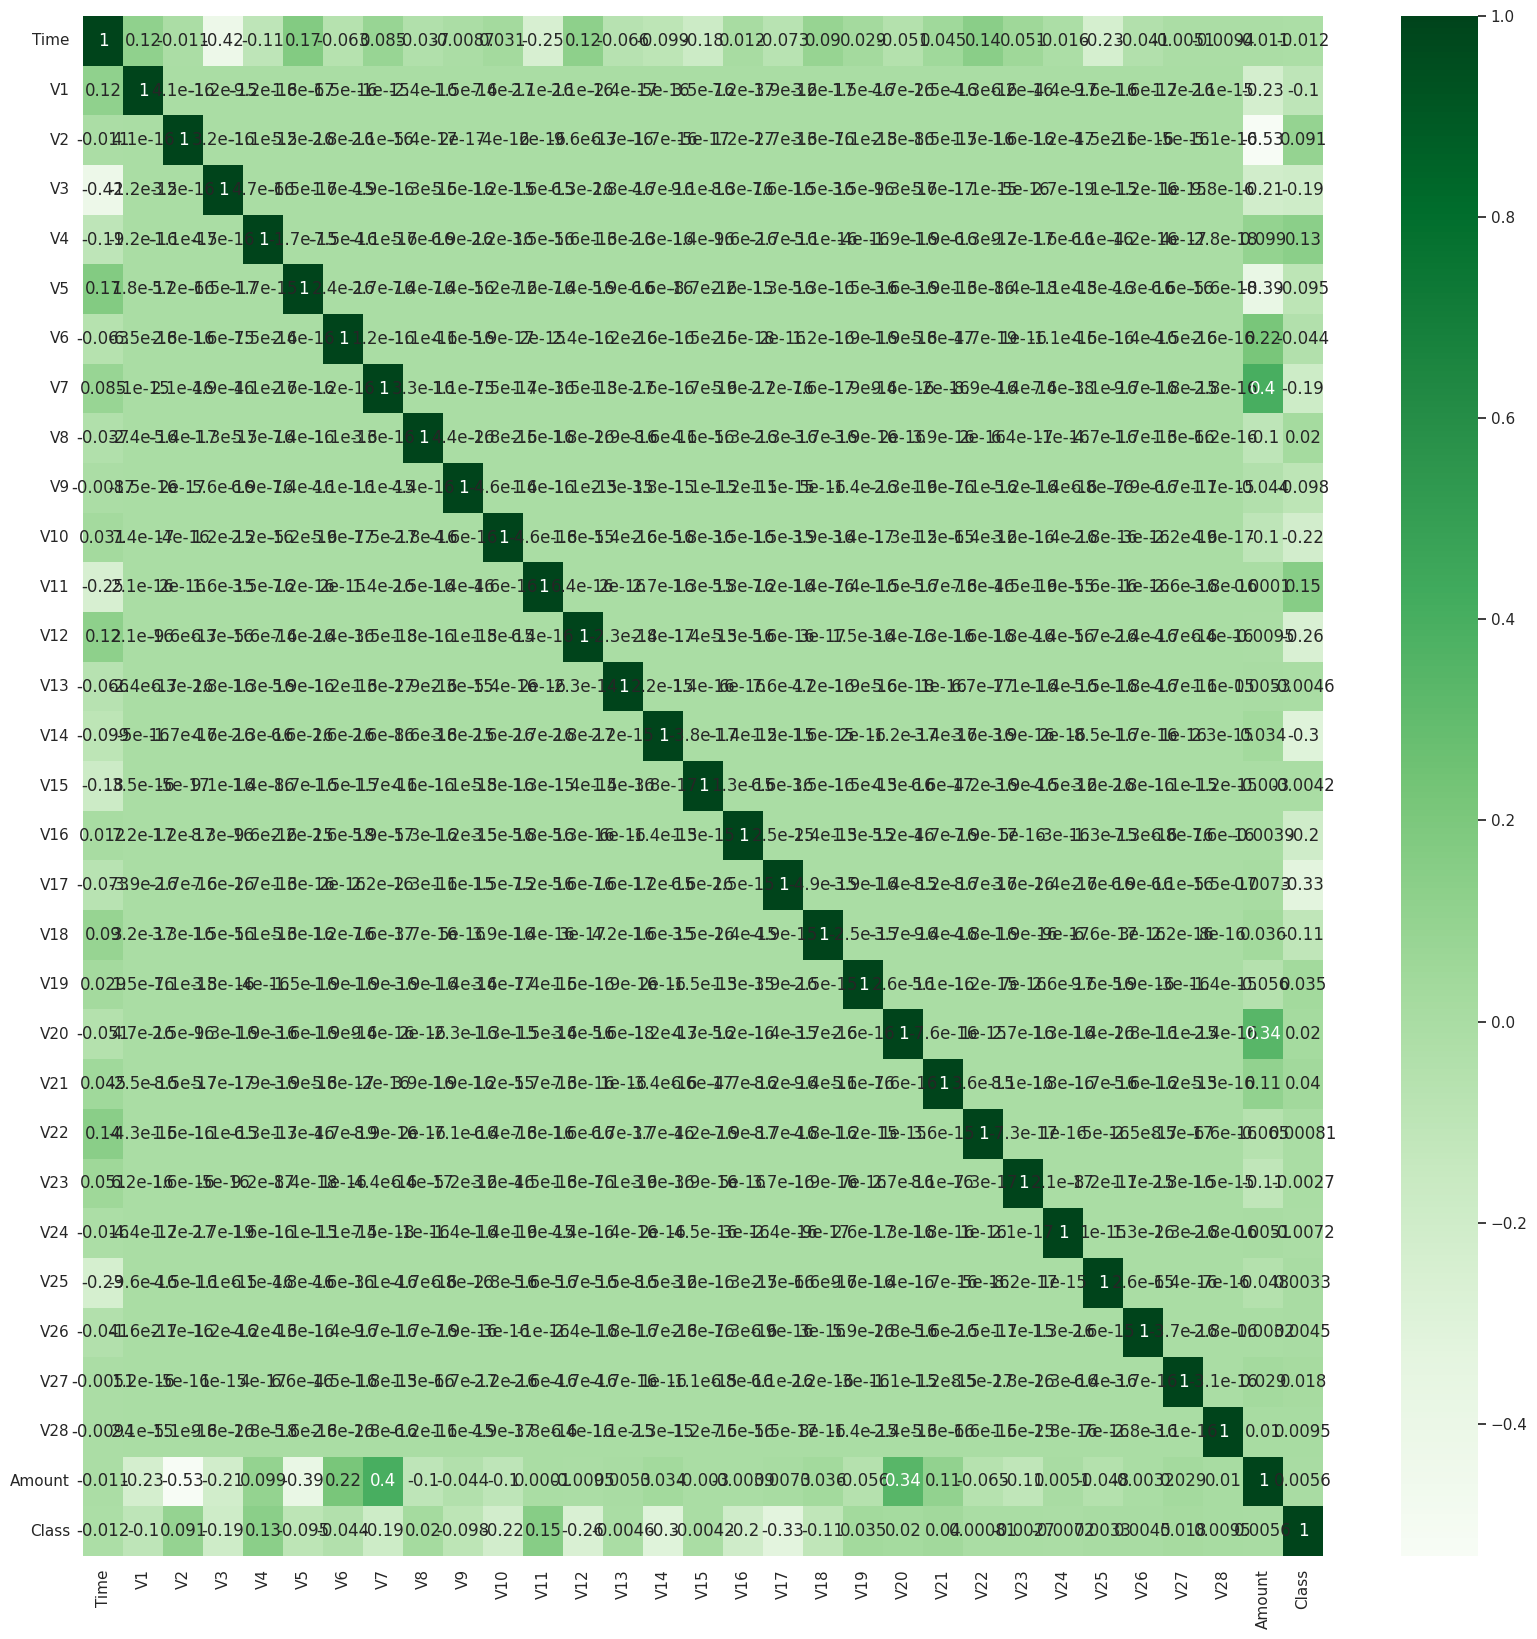

In [20]:
corrmat=d1.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="Greens")

In [21]:
#create independent and dependent features 
columns =d1.columns.tolist()
columns=[c for c in columns if c not in ['Class']]
target = "Class"
state = np.random.RandomState(42)
x=d1[columns]
y=d1[target]
x_otuliers =state.uniform(low=0,high=1,size=(x.shape[0],x.shape[1]))
print(x.shape)
print(y.shape)

(28481, 30)
(28481,)


# MODEL PREDICTION

### ISOLATION FOREST ALGORITHM
-It is one of the newest techniques to detec anomalies 
-We know that ML is known for discovering patterns and trian themselfs by balancing categorizing themselves in between the good and bad present in the dataset
-This algorithm isolates and observes randomly and split the value into max as well as min

In [22]:
outlier_fraction = 0.05  # Example value

classifiers = {
    "isolation forest": IsolationForest(n_estimators=100, max_samples=len(x),
                                        contamination=outlier_fraction, random_state=state, verbose=0),
    "local outlier factor": LocalOutlierFactor(n_neighbors=20, algorithm='auto', leaf_size=30, metric='minkowski',
                                               p=2, metric_params=None, contamination=outlier_fraction),
}

In [23]:
np.random.seed(42)

# Define the OneClassSVM instance
svm_classifier = OneClassSVM(kernel='rbf', degree=3, gamma=0.1, nu=0.05, max_iter=-1)

In [24]:
type(classifiers)

dict

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2529,stratify=y)

In [27]:
# Assuming x_test is the unseen data you want to use for decision_function
decision_function_values = lof.decision_function(x_test)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


In [28]:
n_outliers = len(fraud)
for i,(clf_name,clf) in enumerate(classifiers.items()):
    if clf_name =='Local Outlier Factor ':
        y_pred =clf.fit_predict(x)
        scores_prediction =clf.negative_outlier_factor_
    elif clf_name =='Support Vector Machine':
        clf.fit(x)
        y_pred=clf.predict(X)
    else:
        clf.fit(x)
        scores_prediction =clf.decision_function(x)
        y_pred = clf.predict(x)
    y_pred[y_pred==1]=0
    y_pred[y_pred== -1]=1
    n_errors =(y_pred != y).sum()
    print("{}:{}".format(clf_name,n_errors))
    print("accuracy score:")
    print(accuracy_score(y,y_pred))
    print("Classification report:")
    print(classification_report(y,y_pred))
        

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
local outlier factor:2947
accuracy score:
0.896527509567782
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     28432
           1       0.00      0.24      0.01        49

    accuracy                           0.90     28481
   macro avg       0.50      0.57      0.48     28481
weighted avg       1.00      0.90      0.94     28481



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=465f362d-158c-47df-86be-9ea859bfe1b7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>